In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Questions to be answered

1. What are the top 5 most common movie genres?
2. What is the average IMDb rating for all movies?
3. Which directors have directed the most movies?
4. Is there a relationship between movie budget and box office revenue?
5. Which year had the highest number of movie releases?
6. What is the highest-grossing movie in the dataset?
7. What is the average runtime of movies?

In [112]:
df = pd.read_csv(r"D:\tmdb-movies (1).csv",encoding="latin1")
pd.options.display.max_columns = None

In [113]:
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,2947,7.3,2015,174799923.1,1.385749e+09


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   imdb_id         3854 non-null   object 
 2   popularity      3854 non-null   float64
 3   budget          3854 non-null   int64  
 4   revenue         3854 non-null   int64  
 5   original_title  3854 non-null   object 
 6   cast            3850 non-null   object 
 7   director        3853 non-null   object 
 8   runtime         3854 non-null   int64  
 9   genres          3854 non-null   object 
 10  vote_count      3854 non-null   int64  
 11  vote_average    3854 non-null   float64
 12  release_year    3854 non-null   int64  
 13  budget_adj      3854 non-null   float64
 14  revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 451.8+ KB


In [115]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39896.114946,1.191489,3.720889e+07,1.076865e+08,109.217955,527.728853,6.167722,2001.262584,4.424478e+07,1.370645e+08
std,67220.996001,1.475183,4.220611e+07,1.765394e+08,19.924311,879.952595,0.795097,11.283367,4.480675e+07,2.161115e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797265,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38578.000000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [116]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [117]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
647,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime,110,5.0,2010,30000000.0,967000.0


In [118]:
df.drop_duplicates(inplace=True)

In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

##### Feature Engineering

In [121]:
genre_count = df['genres'].value_counts().head()
print(genre_count)


genres
Drama        890
Comedy       787
Action       689
Adventure    314
Horror       275
Name: count, dtype: int64


In [122]:
average_rating = df['vote_average'].mean()
print(average_rating)

6.168024915650143


In [123]:
top_director = df['director'].value_counts().head()
print(top_director)

director
Steven Spielberg    27
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
Name: count, dtype: int64


In [124]:
correlation = df['budget'].corr(df['revenue'])
print("Correlation between Budget and Revenue:", correlation)

Correlation between Budget and Revenue: 0.6885249580206682


In [125]:
df['year'] = pd.to_datetime(df ['release_year']).dt.year
top_year = df['year'].value_counts().head()
print(top_year)


year
1970    3853
Name: count, dtype: int64


In [126]:
highest_grossing = df.loc[df['revenue'].idxmax(), ['original_title', 'revenue']]
print(highest_grossing)

original_title        Avatar
revenue           2781505847
Name: 344, dtype: object


In [127]:
average_runtime = df['runtime'].mean()
print("Average Runtime (minutes):", average_runtime)

Average Runtime (minutes): 109.22242408512847


C:\Users\pc\AppData\Local\Temp\ipykernel_884\2307868656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')


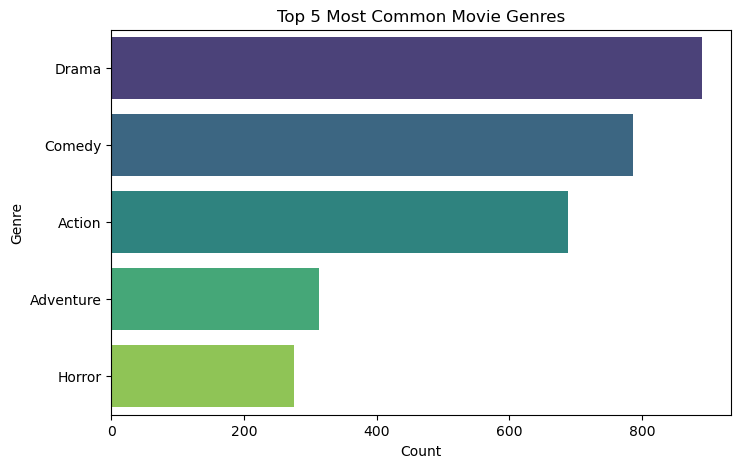

In [128]:
genre_count = df['genres'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')
plt.title('Top 5 Most Common Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


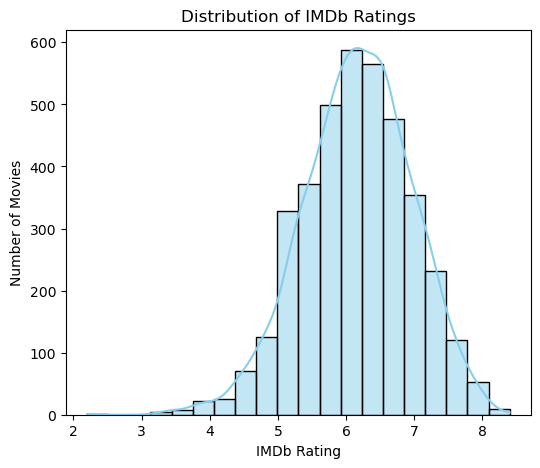

In [129]:
plt.figure(figsize=(6,5))
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_884\1098637166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


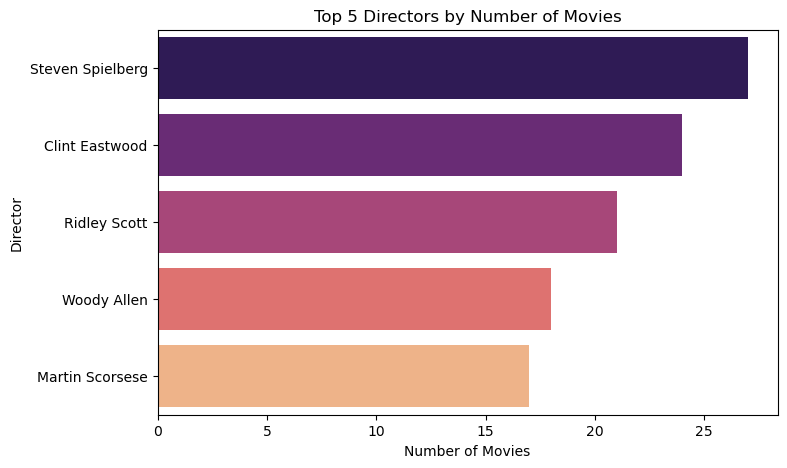

In [130]:
top_directors = df['director'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 5 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


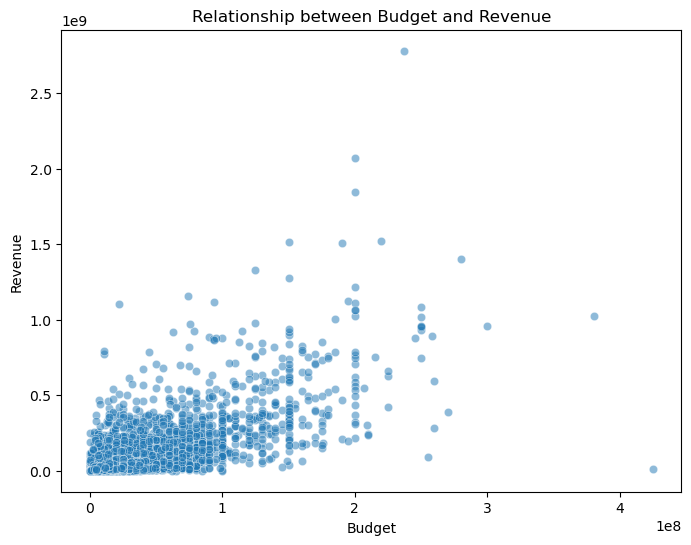

In [131]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


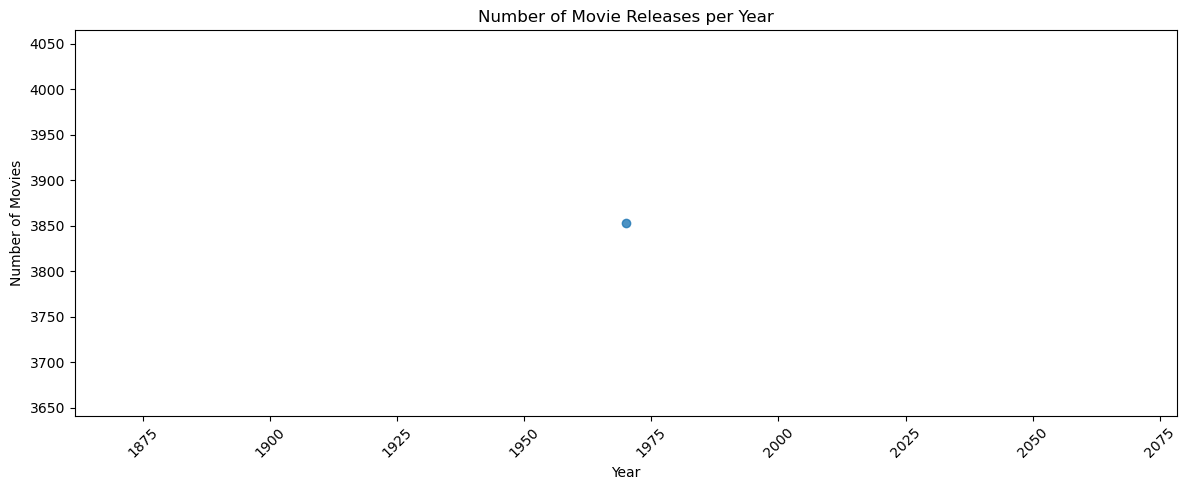

In [132]:
plt.figure(figsize=(12,5))
sns.regplot(x=top_year.index, y=top_year.values, marker='o')
plt.title('Number of Movie Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

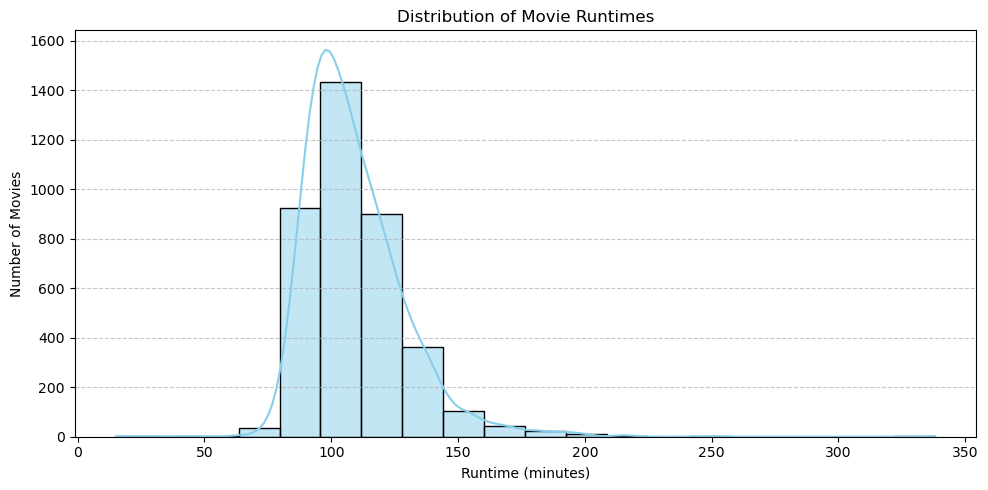

In [133]:
runtime_data = df['runtime'].dropna()
plt.figure(figsize=(10,5))
sns.histplot(runtime_data, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

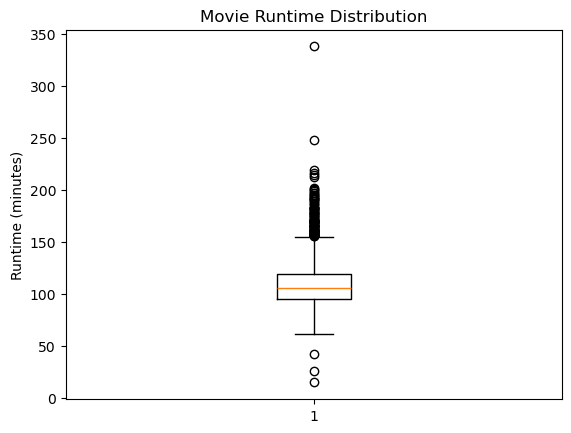

In [134]:
plt.boxplot(df['runtime'].dropna())
plt.title('Movie Runtime Distribution')
plt.ylabel('Runtime (minutes)')
plt.show()
